# Analysis of the splitting thresholds. 

In [62]:
%load_ext autoreload
%autoreload 2


import os
os.chdir("../")
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
seaborn.set(font_scale=2)
seaborn.set_style("white")
np.random.seed(1)
np.set_printoptions(precision=6, suppress=True)
plot_height, legend_size, marker_size, line_width = 8, 18, 0.4, 1.2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model name: 2019-05-21 18:47:22 dataset=gts_120_warning model=plain n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0
Model name: 2019-05-21 18:47:22 dataset=gts_120_warning model=robust_bound n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0
Model name: 2019-05-21 18:47:22 dataset=gts_120_warning model=robust_exact n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0


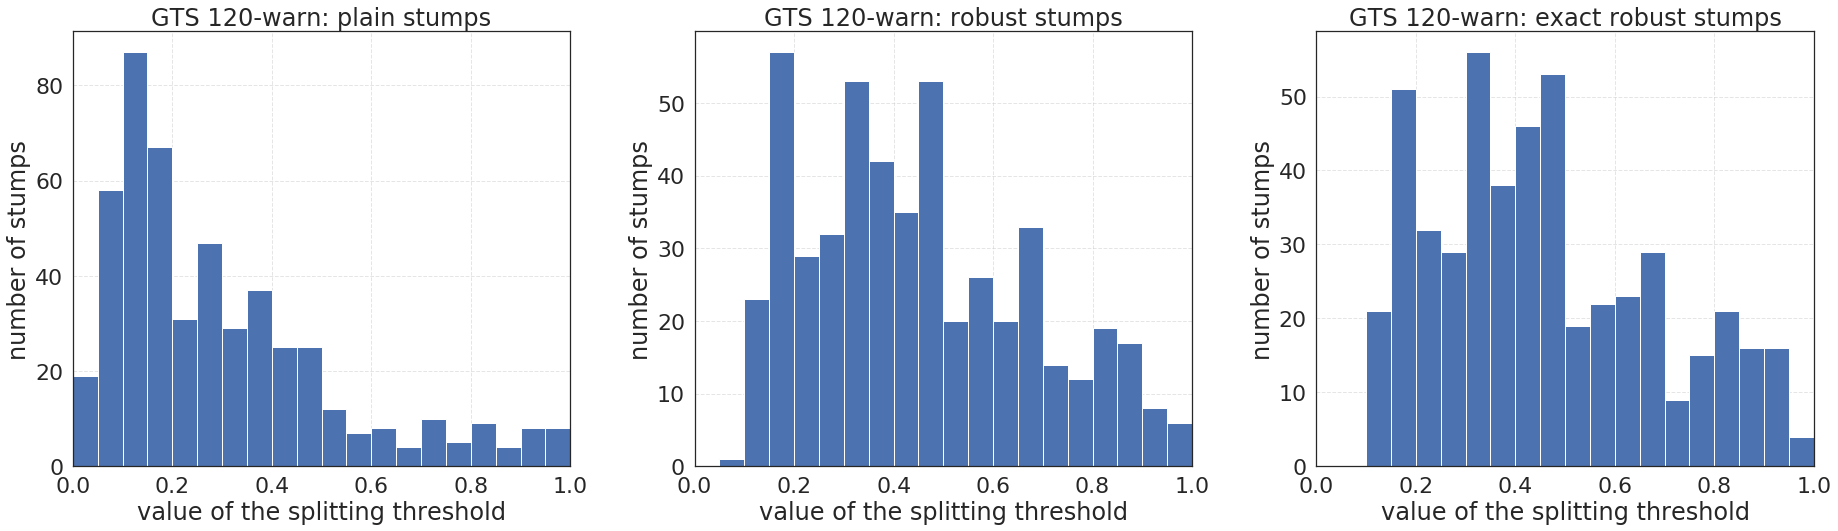

In [67]:
exp_folder = 'exps'
model_names = ['2019-05-21 15:41:28 dataset=mnist_2_6 model=plain n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0',
               '2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_bound n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0',
               '2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_exact n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0']
# model_names = ['2019-05-21 18:47:22 dataset=gts_120_warning model=plain n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
#                '2019-05-21 18:47:22 dataset=gts_120_warning model=robust_bound n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
#                '2019-05-21 18:47:22 dataset=gts_120_warning model=robust_exact n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0']

fig_width = 1.3*len(model_names)*plot_height
fig_height = plot_height
fig, axs = plt.subplots(1, len(model_names), figsize=(fig_width, fig_height))
for i, model_name in enumerate(model_names):
    print('Model name: {}'.format(model_name))
    dataset = model_name.split('dataset=')[1].split(' ')[0]
    model = model_name.split('model=')[1].split(' ')[0]
    # weak_learner = model_name.split('weak_learner=')[1].split(' ')[0]  # doesn't exist for stumps
    weak_learner = 'stump'
    eps = model_name.split('eps=')[1].split(' ')[0]
    
    model_path = model_name + '.model'
    model_arr = np.loadtxt(exp_folder + '/' + model_path)
    bs = model_arr[:, 2]
    
    if model == 'robust_bound':
        model = 'robust'
    elif model == 'robust_exact':
        model = 'exact robust'

    dataset_ = dataset.upper().replace('_', ' ').replace('120 WARNING', '120-warn').replace('2 6', '2-6')
    plot_name_short = '{}: {} stumps'.format(dataset_, model)
    ax = axs[i]
    ax.hist(bs, bins=np.linspace(0.0, 1.0, 21))
    ax.set_xlim(0.0, 1.0)
    ax.set_xlabel('value of the splitting threshold')
    ax.set_ylabel('number of stumps')
    ax.set_xticks(np.linspace(0.0, 1.0, 6))
    ax.tick_params(which='both', width=2)
    ax.grid(which='both', alpha=0.5, linestyle='--')
    ax.set_title(plot_name_short)
    
plot_name_save = 'dataset={}-weak_learner=stump-histogram_of_thresholds'.format(dataset)
# fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
plt.savefig('plots/{}.pdf'.format(plot_name_save), bbox_inches='tight')

# 415, 364, 197 weak learners in total